In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Import Data from cleaned csv

In [47]:
df = pd.read_csv('data_cleaned.csv')

#### Data Visualization

In [34]:
df.describe()

,ct1_R,ct1_ACS,ct1_KAST,ct1_ADR,ct1_HS,ct2_R,ct2_ACS,ct2_KAST,ct2_ADR,ct2_HS,...,t4_R,t4_ACS,t4_KAST,t4_ADR,t4_HS,t5_R,t5_ACS,t5_KAST,t5_ADR,t5_HS
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,1.365017,273.293290,0.778948,176.698052,0.292748,1.174866,230.422944,0.756200,150.368182,0.279811,...,0.823908,167.333874,0.668701,111.104762,0.254579,0.678981,140.599026,0.629591,94.631385,0.238363
std,0.307274,58.558557,0.113111,37.324847,0.094914,0.267844,48.761222,0.118419,31.791985,0.096081,...,0.241354,41.860505,0.132683,27.451528,0.098488,0.239774,40.973421,0.139699,27.042258,0.102832
min,0.290000,47.000000,0.270000,31.000000,0.020000,0.220000,14.000000,0.270000,14.000000,0.030000,...,0.080000,18.000000,0.140000,16.000000,0.000000,0.020000,9.000000,0.000000,8.000000,0.000000
25%,1.150000,233.000000,0.710000,151.000000,0.220000,0.990000,198.000000,0.680000,129.000000,0.210000,...,0.660000,140.000000,0.580000,93.000000,0.190000,0.510000,113.000000,0.540000,76.000000,0.170000
50%,1.350000,268.000000,0.780000,174.000000,0.280000,1.180000,227.000000,0.760000,148.000000,0.270000,...,0.820000,166.000000,0.680000,110.000000,0.240000,0.680000,140.000000,0.640000,94.000000,0.230000
75%,1.560000,309.000000,0.860000,199.000000,0.350000,1.360000,260.000000,0.830000,170.000000,0.340000,...,0.990000,193.000000,0.760000,129.000000,0.310000,0.840000,168.000000,0.730000,112.000000,0.300000
max,2.540000,607.000000,1.000000,384.000000,0.760000,2.130000,466.000000,1.000000,306.000000,0.800000,...,1.750000,374.000000,1.000000,254.000000,0.800000,1.620000,301.000000,1.000000,203.000000,1.000000


c:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

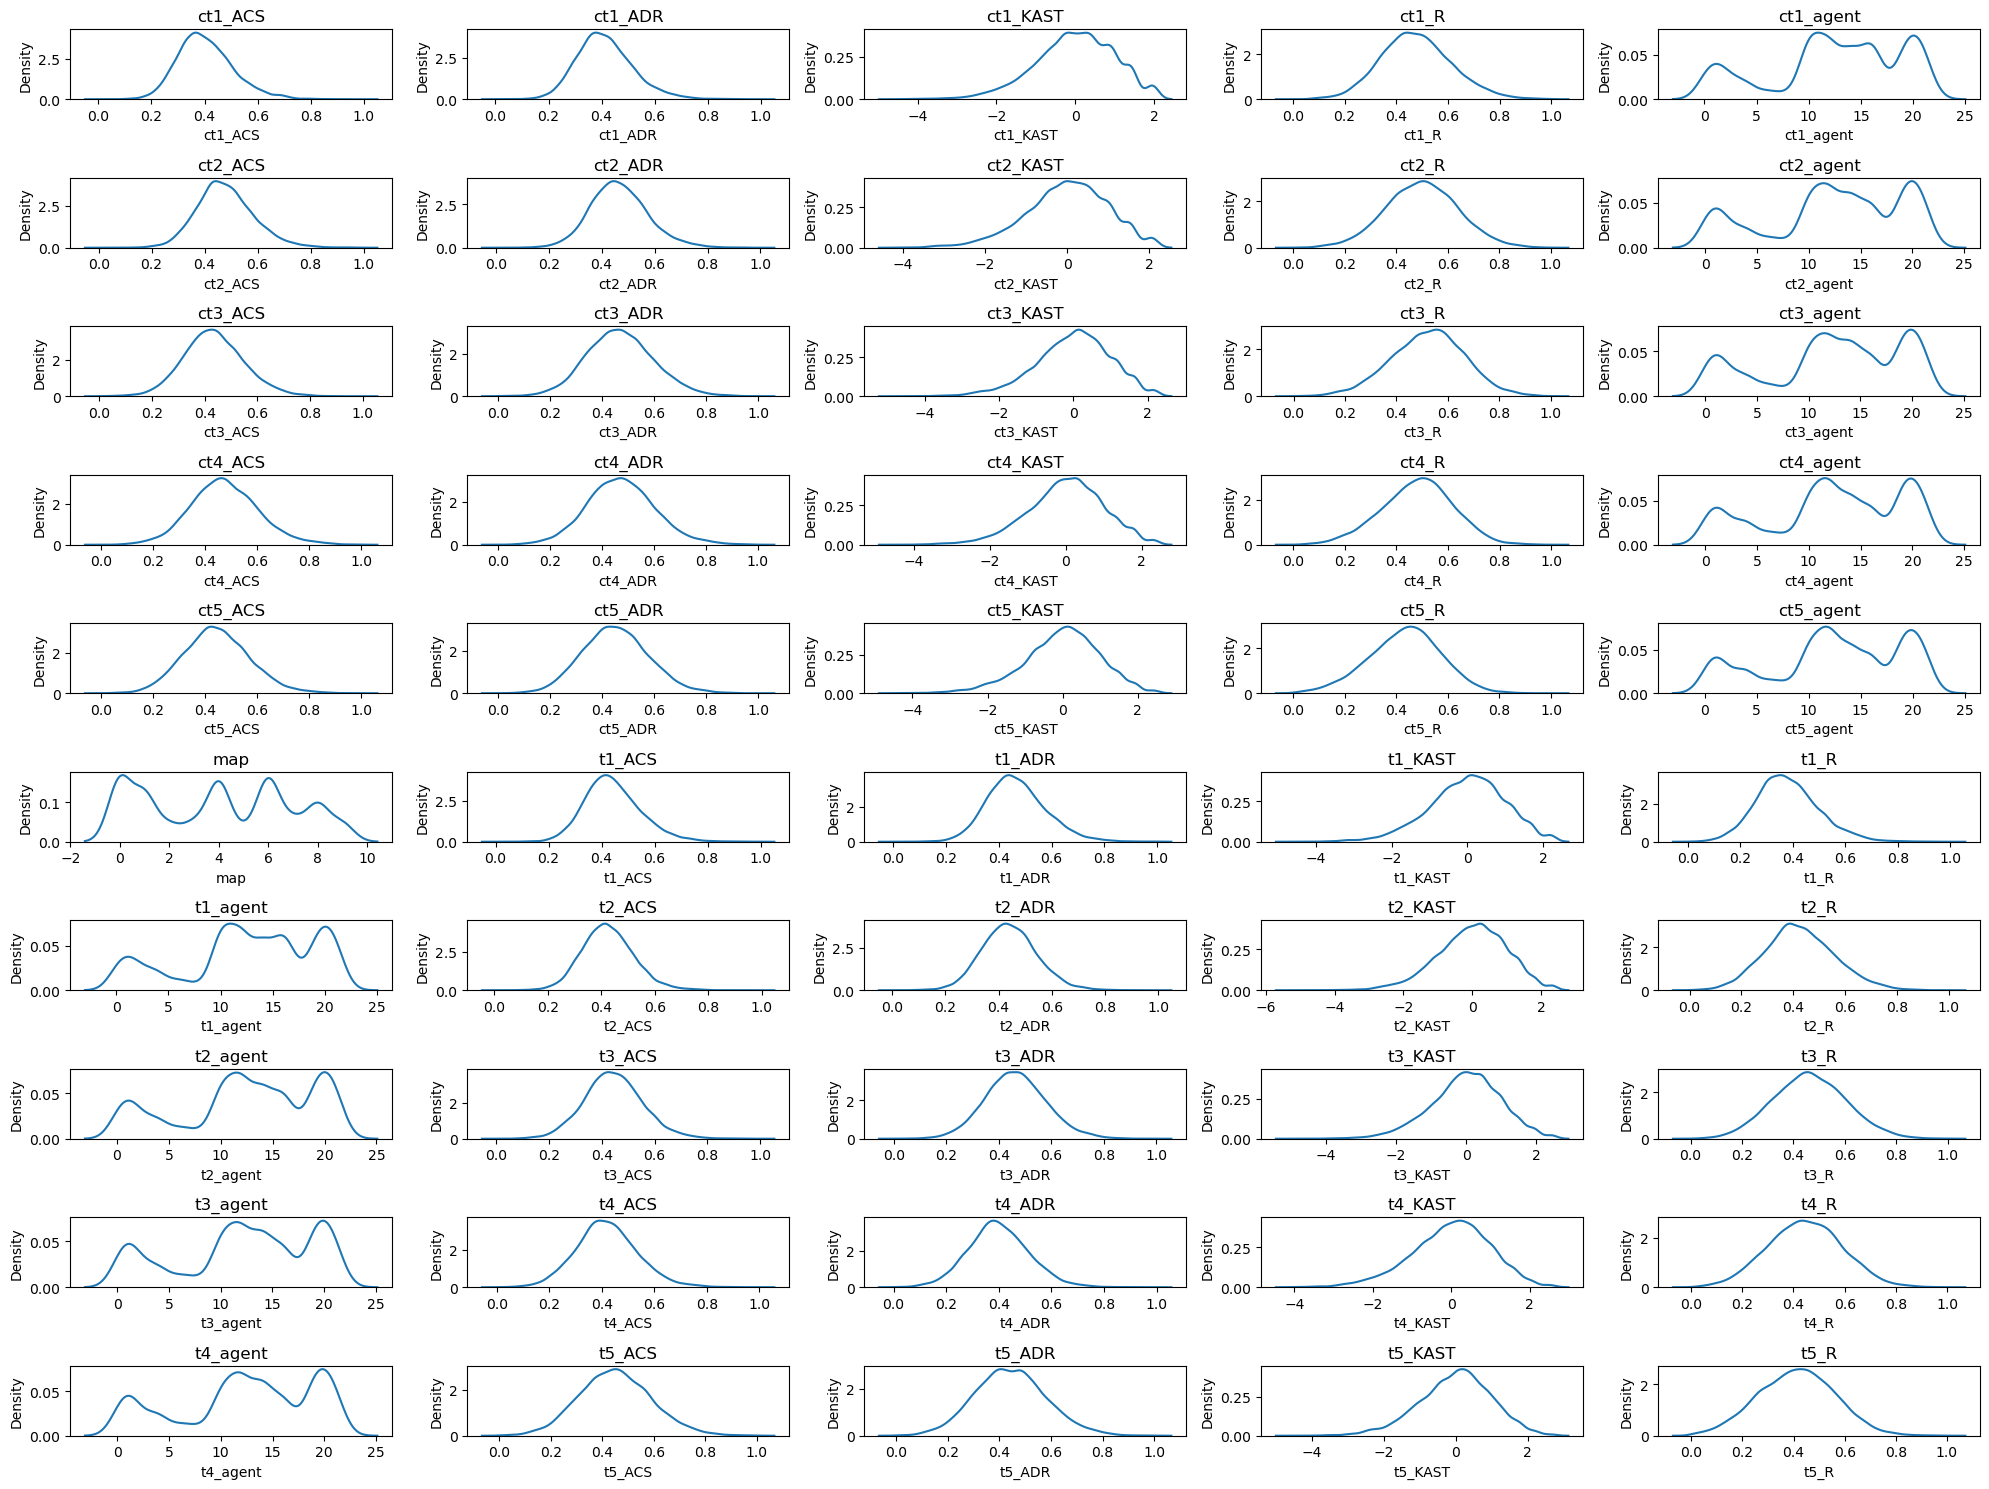

In [53]:
from scipy import stats
import seaborn as sns

# Assuming you have your DataFrame loaded as 'df'
num_cols = df[cols] # Select numerical columns

# Set up a grid layout for efficient plotting
num_rows, num_cols_per_row = (10, 5)  # Adjust rows and columns as needed
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 15))  # Adjust figure size

# Iterate through numerical columns and create kernel density plots
col_count = 0
for i in range(num_rows):
    for j in range(num_cols_per_row):
        if col_count >= len(num_cols):
            axes[i, j].axis('off')  # Hide empty subplots if less than 50 columns
            continue

        col_name = num_cols.columns[col_count]
        sns.kdeplot(num_cols[col_name], ax=axes[i, j])  # Plot kernel density using seaborn
        axes[i, j].set_title(col_name)  # Set title with column name
        col_count += 1

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

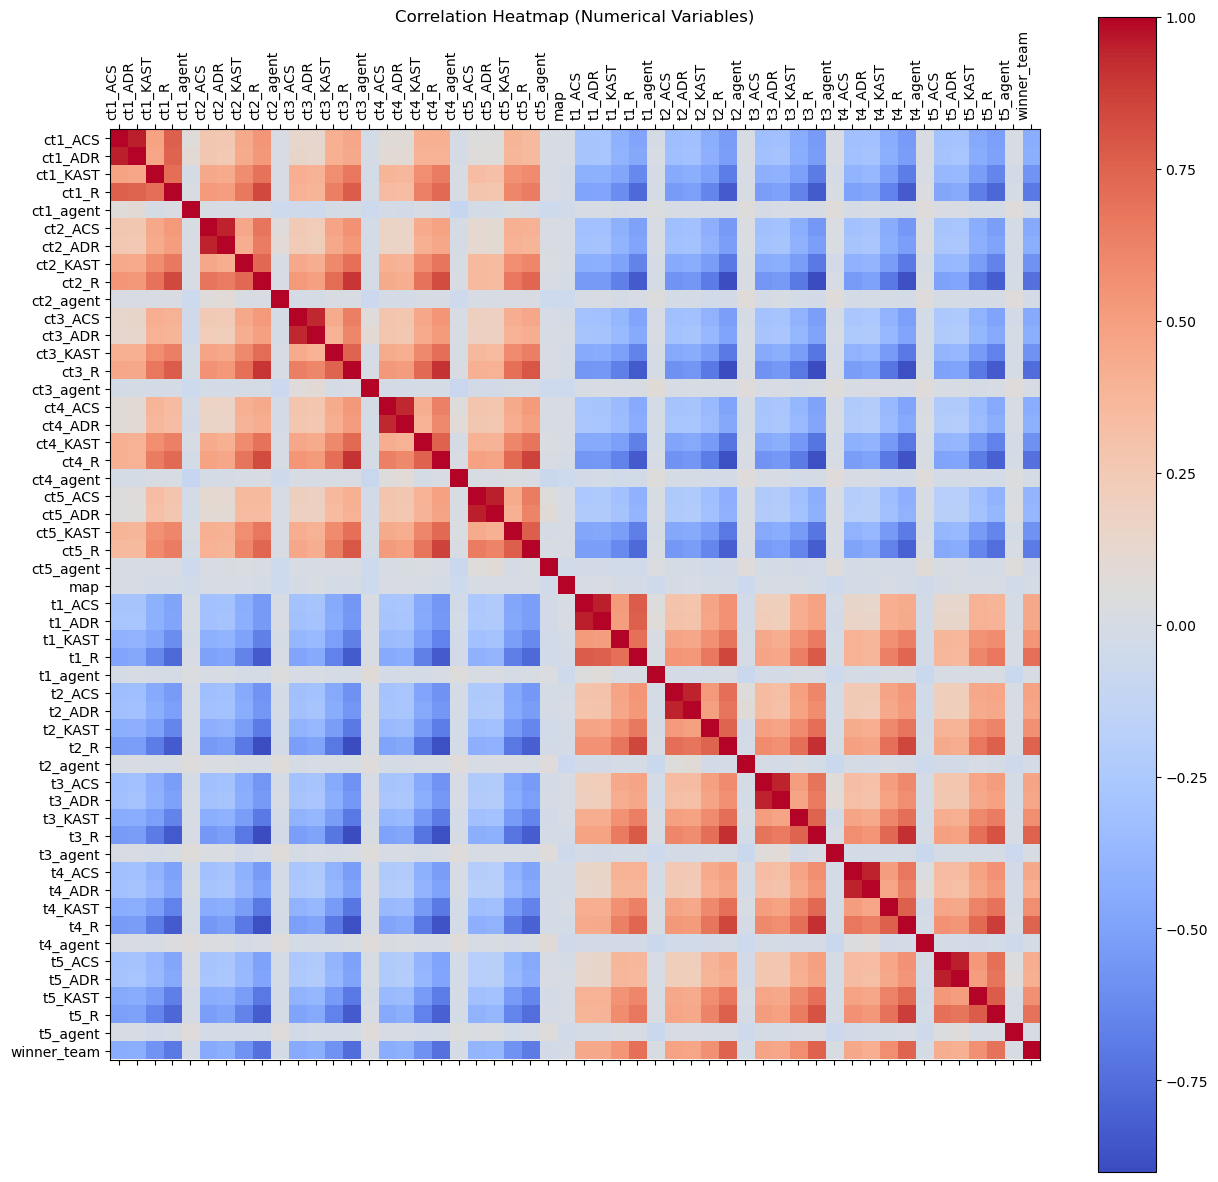

In [55]:
# Numerical-Numerical Correlation (using corr())

numerical_corr = df[cols].corr()
plt.figure(figsize=(15, 15))
ax = plt.axes()
heatmap = ax.matshow(numerical_corr, cmap='coolwarm')
plt.colorbar(heatmap)
plt.xticks(range(len(numerical_corr.columns)), numerical_corr.columns, rotation=90, ha='right')
plt.yticks(range(len(numerical_corr.columns)), numerical_corr.columns)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

- [R, ACS, ADR] normalized
- [KAST, HS] not normalized
- HS% not correlated (drop)

In [45]:
# numerical datatype
r_list = ['ct1_R',
'ct2_R',
'ct3_R',
'ct4_R',
'ct5_R',
't1_R',
't2_R',
't3_R',
't4_R',
't5_R']

acs_list = ['ct1_ACS',
'ct2_ACS',
'ct3_ACS',
'ct4_ACS',
'ct5_ACS',
't1_ACS',
't2_ACS',
't3_ACS',
't4_ACS',
't5_ACS']

adr_list = ['ct1_ADR',
'ct2_ADR',
'ct3_ADR',
'ct4_ADR',
'ct5_ADR',
't1_ADR',
't2_ADR',
't3_ADR',
't4_ADR',
't5_ADR']

attr_list = r_list + acs_list + adr_list
attr_list.sort()

kast_list = ['ct1_KAST',
                'ct2_KAST',
                'ct3_KAST',
                'ct4_KAST',
                'ct5_KAST',
                't1_KAST',
                't2_KAST',
                't3_KAST',
                't4_KAST',
                't5_KAST']


numerical_list = attr_list + kast_list
numerical_list.sort()

# String datatype
agent_list = ['ct1_agent', 'ct2_agent', 'ct3_agent', 'ct4_agent', 'ct5_agent',
              't1_agent', 't2_agent', 't3_agent', 't4_agent', 't5_agent']

other_list = ['map', 'winner_team']

cols = numerical_list + agent_list + other_list
cols.sort()

In [49]:
# standardize numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

df[kast_list] = standard_scaler.fit_transform(df[kast_list])
df[attr_list] = minmax_scaler.fit_transform(df[attr_list])

In [51]:
# label encoding categorical data

from sklearn.preprocessing import LabelEncoder
# label encoding string type data
le = LabelEncoder()

# encode with same label for all agent
le.fit(df['ct1_agent'])
for agent in agent_list: 
    df[agent] = le.transform(df[agent])
    
print(le.classes_) # encode same format for new data

df['map'] = le.fit_transform(df['map'])

df['winner_team'] = le.fit_transform(df['winner_team'])

['Astra' 'Breach' 'Brimstone' 'Chamber' 'Cypher' 'Deadlock' 'Fade' 'Gekko'
 'Harbor' 'Iso' 'Jett' 'Kayo' 'Killjoy' 'Neon' 'Omen' 'Phoenix' 'Raze'
 'Reyna' 'Sage' 'Skye' 'Sova' 'Viper' 'Yoru']


In [ ]:
hs_list = ['ct1_HS',
'ct2_HS',
'ct3_HS',
'ct4_HS',
'ct5_HS',
't1_HS',
't2_HS',
't3_HS',
't4_HS',
't5_HS']

df.drop(hs_list, axis=1, inplace=True)

In [ ]:
df.describe()

,ct1_R,ct1_ACS,ct1_KAST,ct1_ADR,ct2_R,ct2_ACS,ct2_KAST,ct2_ADR,ct3_R,ct3_ACS,...,t3_KAST,t3_ADR,t4_R,t4_ACS,t4_KAST,t4_ADR,t5_R,t5_ACS,t5_KAST,t5_ADR
count,9240.000000,9240.000000,9.240000e+03,9240.000000,9240.000000,9240.000000,9.240000e+03,9240.000000,9240.000000,9240.000000,...,9.240000e+03,9240.000000,9240.000000,9240.000000,9.240000e+03,9240.000000,9240.000000,9240.000000,9.240000e+03,9240.000000
mean,0.477785,0.404095,2.460754e-17,0.412742,0.499930,0.478812,4.106383e-16,0.467014,0.522592,0.434108,...,-2.676070e-16,0.464444,0.445454,0.419477,1.276516e-16,0.399600,0.411863,0.450682,-7.843654e-16,0.444264
std,0.136566,0.104569,1.000054e+00,0.105736,0.140233,0.107879,1.000054e+00,0.108877,0.142638,0.114602,...,1.000054e+00,0.117303,0.144523,0.117586,1.000054e+00,0.115343,0.149858,0.140320,1.000054e+00,0.138678
min,0.000000,0.000000,-4.499779e+00,0.000000,0.000000,0.000000,-4.105980e+00,0.000000,0.000000,0.000000,...,-4.930532e+00,0.000000,0.000000,0.000000,-3.984903e+00,0.000000,0.000000,0.000000,-4.507000e+00,0.000000
25%,0.382222,0.332143,-6.095927e-01,0.339943,0.403141,0.407080,-6.435139e-01,0.393836,0.428571,0.357513,...,-5.787932e-01,0.383673,0.347305,0.342697,-6.685553e-01,0.323529,0.306250,0.356164,-6.413470e-01,0.348718
50%,0.471111,0.394643,9.300623e-03,0.405099,0.502618,0.471239,3.208932e-02,0.458904,0.525714,0.430052,...,5.418694e-02,0.461224,0.443114,0.415730,8.516004e-02,0.394958,0.412500,0.448630,7.451470e-02,0.441026
75%,0.564444,0.467857,7.166073e-01,0.475921,0.596859,0.544248,6.232421e-01,0.534247,0.617143,0.507772,...,6.871671e-01,0.538776,0.544910,0.491573,6.881323e-01,0.474790,0.512500,0.544521,7.187903e-01,0.533333
max,1.000000,1.000000,1.954394e+00,1.000000,1.000000,1.000000,2.058899e+00,1.000000,1.000000,1.000000,...,2.427863e+00,1.000000,1.000000,1.000000,2.497049e+00,1.000000,1.000000,1.000000,2.651617e+00,1.000000


In [ ]:
# df.to_csv('data_preprocessed.csv', index=False)